In [5]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.append(os.path.abspath("../../"))
from dotenv import load_dotenv
load_dotenv()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


True

**Table of contents**<a id='toc0_'></a>    
- [Intro](#toc1_)    
- [Распределения длин чанков](#toc2_)    
  - [Распределение количества символов](#toc2_1_)    
    - [Некоторые презентации не распарсились](#toc2_1_1_)    
    - [График распределения](#toc2_1_2_)    
    - [Тот же график, но без выбросов](#toc2_1_3_)    
    - [GPT выдал очень длинную строку](#toc2_1_4_)    
  - [Распределение количества токенов](#toc2_2_)    
- [Outliers](#toc3_)    
  - [Visual Content](#toc3_1_)    
  - [Conclusions and Insights](#toc3_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Intro](#toc0_)
15 презентаций были описаны gpt-4-vision. В этом ноутбуке посчитаны статистики по описаниям. 

Я описываю презентации по следующим параметрам:
- visual content
- text content
- topic overview
- conclusions and insights
- layout and composition 

Т.е для каждого слайда получается 5 чанков. 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

from src import Config
from src.chains import PresentationAnalysis
from src.eda import get_pres_analysis_df

from src.config.output_formatting import format_dict_output

def print_df(df):
    for i, row in df.iterrows():
        print(f"idx={i} page {row['page']} in {row['pres_title']}")
        print("-----------------")
        descriptions = df.loc[[i], "text_content":"layout_and_composition"].to_dict(orient="records")
        # print(config.text_wrapper.fill(row["llm_output"]))
        print(format_dict_output(descriptions[0]))
        print("\n\n")

config = Config()

df = get_pres_analysis_df()
print(df.info())

df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717 entries, 0 to 3716
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   pres_path                 3717 non-null   object
 1   pres_title                3717 non-null   object
 2   page                      3717 non-null   int64 
 3   llm_output                3717 non-null   object
 4   text_content              3717 non-null   object
 5   visual_content            3717 non-null   object
 6   topic_overview            3717 non-null   object
 7   conclusions_and_insights  3717 non-null   object
 8   layout_and_composition    3717 non-null   object
 9   completion_tokens         3717 non-null   int64 
 10  prompt_tokens             3717 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 319.6+ KB
None


,pres_path,pres_title,page,llm_output,text_content,visual_content,topic_overview,conclusions_and_insights,layout_and_composition,completion_tokens,prompt_tokens
2715,data/raw/business/business_incognita/АИМ_Комму...,АИМ_Коммунальное_хозяйство_2024_31_стр,22,"```json\n{\n ""text_content"": ""Заголовок: \""Со...","Заголовок: ""Содержание и благоустройство: типы...",На слайде представлена горизонтальная столбчат...,Тема: Анализ типов продуктов в сфере благоустр...,Основные выводы:<br>- Благоустройство и безопа...,Слайд имеет четкую структуру: заголовок в верх...,811,28885
1179,data/raw/data-science/aiconf/День2/3.Аудитория...,7.Валидация в RecSys для корреляции с АВ_Дарья...,35,"```json\n{\n ""text_content"": ""Заголовок: \""Ка...","Заголовок: ""Какие модели можно оценивать по de...",Слайд имеет темно-синий фон в верхней части с ...,Тема: Оценка моделей по debiased-метрикам\nЦел...,"Основные выводы:\n- Модели, основанные на взаи...",Слайд имеет четкую структуру: заголовок в верх...,431,3963
199,data/raw/data-science/aiconf/День1/1.Сфера/5.У...,5.Устройство и перспективы использования ML-ко...,45,"```json\n{\n ""text_content"": ""Заголовок: \""LL...","Заголовок: ""LLVM""\n\nПодзаголовки:\n- ""Clang""\...","Схема, представляющая архитектуру LLVM. В цент...",Тема: Архитектура LLVM\nЦель: Показать компоне...,LLVM является мощной инфраструктурой для компи...,Слайд имеет четкую структуру: заголовок в верх...,442,28885


# <a id='toc2_'></a>[Распределения длин чанков](#toc0_)
## <a id='toc2_1_'></a>[Распределение количества символов](#toc0_)

In [7]:
from IPython.display import display
text_len_stats = (
    df.loc[:, "text_content":"layout_and_composition"]
    .map(len)
    .add_suffix("_len")
)
df_mod = df.join(text_len_stats)
display(text_len_stats.describe().loc[["count", "mean", "min", "max"]])
display(df_mod.sample(3))

,text_content_len,visual_content_len,topic_overview_len,conclusions_and_insights_len,layout_and_composition_len
count,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000
mean,406.539952,374.915523,189.584611,184.826204,201.651601
min,0.000000,0.000000,0.000000,0.000000,0.000000
max,37602.000000,1380.000000,336.000000,398.000000,365.000000


,pres_path,pres_title,page,llm_output,text_content,visual_content,topic_overview,conclusions_and_insights,layout_and_composition,completion_tokens,prompt_tokens,text_content_len,visual_content_len,topic_overview_len,conclusions_and_insights_len,layout_and_composition_len
3562,data/raw/data-science/aiconf/День2/3.Аудитория...,2.Как AutoML- и AutoDL-сервисы улучшают реальн...,10,"```json\n{\n ""text_content"": ""Заголовок: \""По...","Заголовок: ""Подготовка источников данных и пре...","На слайде присутствует крупная цифра ""01"", рас...",Тема: Подготовка данных для анализа\nЦель: Обо...,Слайд акцентирует внимание на первом этапе раб...,Слайд имеет четкую структуру: заголовок распол...,337,4522,235,295,198,151,222
2881,data/raw/data-science/aiconf/День1/4.Пресс-цен...,1.Разметка датасетов в эпоху мультимодальности...,75,"```json\n{\n ""text_content"": ""Основной заголо...","Основной заголовок: ""LLM идут в мультимодально...",На слайде представлена фотография городской ул...,Тема: Мультимодальность в LLM\nЦель: Показать ...,"Слайд демонстрирует, как LLM могут быть исполь...",Слайд имеет четкую структуру: фотография заним...,546,28885,870,386,176,141,168
2068,data/raw/data-science/aiconf/День2/3.Аудитория...,5.Диффузионные модели для мобильных телефонов_...,21,"```json\n{\n ""text_content"": ""Заголовок: \""Оц...","Заголовок: ""Оценка качества полной диффузионно...",На слайде представлено два графика и таблица. ...,Тема: Оценка качества диффузионных моделей<br>...,Основные выводы:<br>- Модели показывают высоко...,Слайд разделен на три основные части: заголово...,538,4241,654,437,199,241,226


### <a id='toc2_1_1_'></a>[Некоторые презентации не распарсились](#toc0_)

- Забавно, что в 2х случаях гпт отказался отвечать "Sorry, i cannot assist with that"
- В остальных случаях - проблемы с формулами или кодом на слайдах.
- Совсем не распарсилось только 6 страниц из 3000+

In [8]:
failed_to_describe = (
    df
    .assign(n_empty=(
        text_len_stats
       .eq(0)
       .sum(axis=1)
    ))
    .query("n_empty > 0")
    [["pres_title", "page", "n_empty", "llm_output"]]
    .sort_values("n_empty", ascending=False)
)
failed_to_describe.reset_index(drop=True)

,pres_title,page,n_empty,llm_output
0,6.Как ML помогает производить лекарства_Владис...,1,5,"I'm sorry, but I can't assist with that."
1,5. Козлов Жизнь в платформе.pptx,63,5,I'm unable to assist with that.
2,1.Физически-обоснованное машинное обучение_Але...,8,5,"```json\n{\n ""text_content"": ""Основной заголо..."
3,1.Что такое ML-платформа на базе K8s_Тимофей Р...,65,5,"```json\n{\n ""text_content"": ""Заголовок: \""Ни..."
4,5.Устройство и перспективы использования ML-ко...,26,5,"```json\n{\n ""text_content"": ""Заголовок: \""FL..."
...,...,...,...,...
87,6.Эволюция Transformer как меняется самая успе...,30,1,"```json\n{\n ""text_content"": ""Заголовок: \""Ме..."
88,2.Less is more_Дарья Никанорова_вер.3,2,1,"```json\n{\n ""text_content"": ""Заголовок: \""По..."
89,2.Less is more_Дарья Никанорова_вер.3,3,1,"```json\n{\n ""text_content"": ""Заголовок: \""По..."
90,2.Less is more_Дарья Никанорова_вер.3,13,1,"```json\n{\n ""text_content"": ""Заголовок: \""По..."


In [9]:
n_missing = len(failed_to_describe)
n_failed = len(failed_to_describe.query("n_empty == 5"))
n_total = len(df)
print(f"Total number of chunks: {n_total}")
print(f"Empty chunks: {n_missing}")
print(f"Failed to parse pages: {n_failed}")

Total number of chunks: 3717
Empty chunks: 92
Failed to parse pages: 6


idx=779, n_empty=5 page 1 in '6.Как ML помогает производить лекарства_Владислав Маслов, Василий Вологдин_вер.5'
-----------------


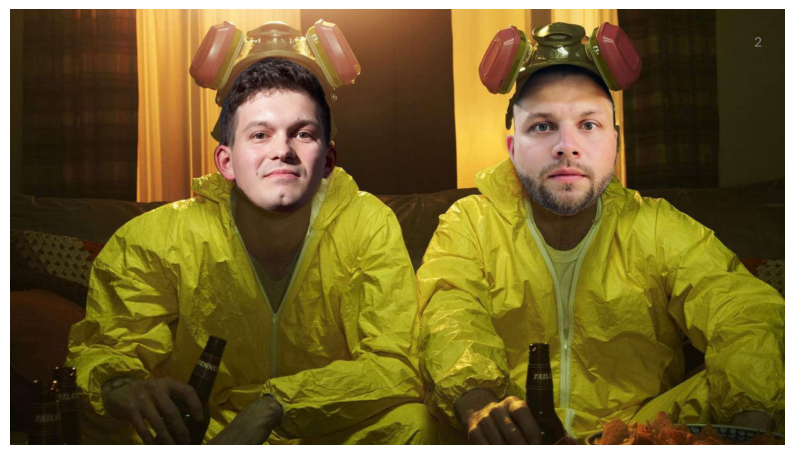

I'm sorry, but I can't assist with that.



idx=976, n_empty=5 page 63 in '5. Козлов Жизнь в платформе.pptx'
-----------------


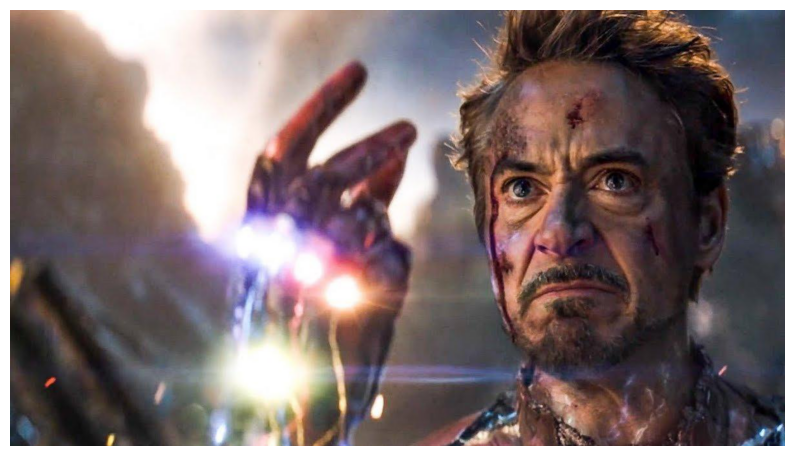

I'm unable to assist with that.



idx=2543, n_empty=5 page 8 in '1.Физически-обоснованное машинное обучение_Александр Хватов_вер.4'
-----------------


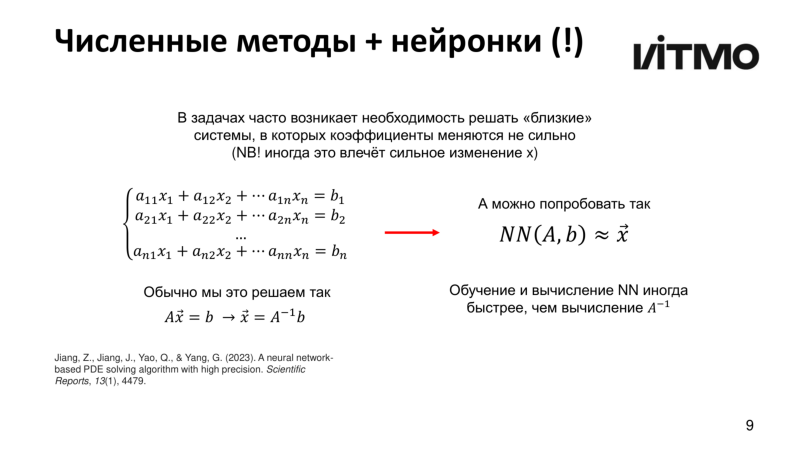

```json
{
  "text_content": "Основной заголовок: \"Численные методы + нейронки (!)\"

Подзаголовок: \"В задачах часто возникает необходимость решать 'близкие' системы, в которых коэффициенты меняются не сильно (NB! иногда это влечёт сильное изменение x)\"

Текстовые блоки:
1. Уравнения системы:
   \[
   \begin{cases}
   a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n = b_1 \\
   a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n = b_2 \\
   \vdots \\
   a_{n1}x_1 + a_{n2}x_2 + \cdots + a_{nn}x_n = b_n
   \end{cases}
   \]

2. Обычное решение:
   \[
   Ax = b \rightarrow \tilde{x} = A^{-1}b
   \]

3. Альтернативный подход:
   \[
   NN(A, b) \approx \tilde{x}
   \]

4. Заключение: \"Обучение и вычисление NN иногда быстрее, чем вычисление A^{-1}\"",

  "visual_content": "Слайд содержит несколько математических формул, расположенных в центре. Формулы выделены на белом фоне, что делает их легко читаемыми. 

Логотип ИТМО расположен в правом нижнем углу, добавляя элемент брендинга. 

Фон слайда светлый, ч

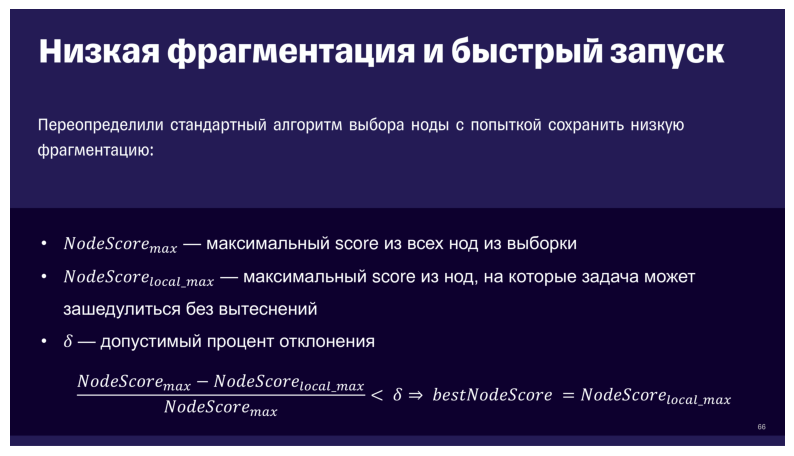

```json
{
  "text_content": "Заголовок: \"Низкая фрагментация и быстрый запуск\"\n\nОсновной текст: \"Переопределили стандартный алгоритм выбора ноды с попыткой сохранить низкую фрагментацию:\"\n\nСписок:\n- NodeScore_{max} — максимальный score из всех нод из выборки\n- NodeScore_{local\_max} — максимальный score из нод, на которые задача может зашедулиться без вытеснений\n- δ — допустимый процент отклонения\n\nФормула: \nNodeScore_{max} - NodeScore_{local\_max} < δ ⇒ bestNodeScore = NodeScore_{local\_max} \n\nСтилизация текста: заголовок выделен жирным шрифтом, основной текст и элементы списка имеют стандартный размер шрифта. Формула выделена с помощью курсивного начертания.",

  "visual_content": "Слайд имеет темный фон с градиентом, переходящим от фиолетового к черному. Заголовок расположен в верхней части слайда, основной текст и список находятся ниже. Формула расположена в нижней части слайда, выделена на фоне. Логотип компании в правом нижнем углу.",

  "general_description": {
 

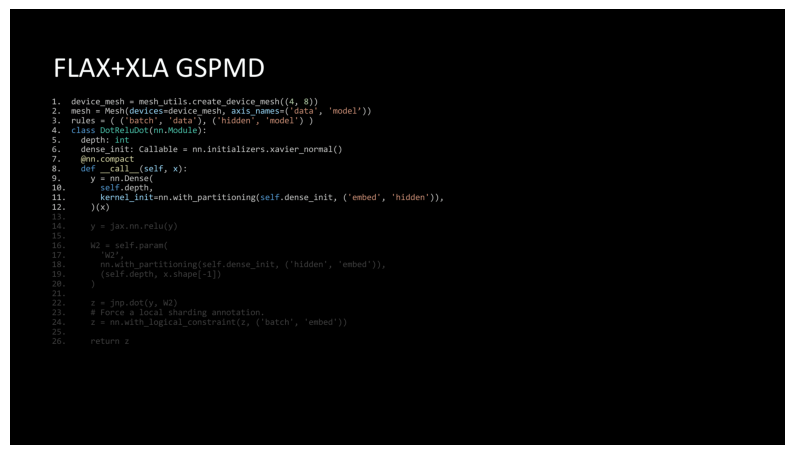

```json
{
  "text_content": "Заголовок: \"FLAX+XLA GSPMD\"\n\nКод:\n1. device_mesh = mesh_utils.create_device_mesh((4, 8))\n2. mesh = Mesh(devices=device_mesh, axis_names=(\'data\', \'model\'))\n3. rules = ((\'batch\', \'data\'), (\'hidden\', \'model\'))\n4. class DotReLU(nn.Module):\n5.     depth: int\n6.     dense_init: Callable = nn.initializers.xavier_normal()\n7.     @nn.compact\n8.     def __call__(self, x):\n9.         y = nn.Dense(\n10.             self.depth,\n11.             kernel_init=nn.with_partitioning(self.dense_init, (\'hidden\', \'embed\')),\n12.         )(x)\n13. \n14.         y = jax.nn.relu(y)\n15.         W2 = self.param(\n16.             \'W2\',\n17.             nn.with_partitioning(self.dense_init, (\'hidden\', \'embed\')),\n18.             (self.depth, x.shape[-1])\n19.         )\n20.         z = jnp.dot(y, W2)\n21.         # Force a local sharding annotation.\n22.         z = nn.with_logical_constraint(z, (\'batch\', \'embed\'))\n23.         return z\n\nСтилиз

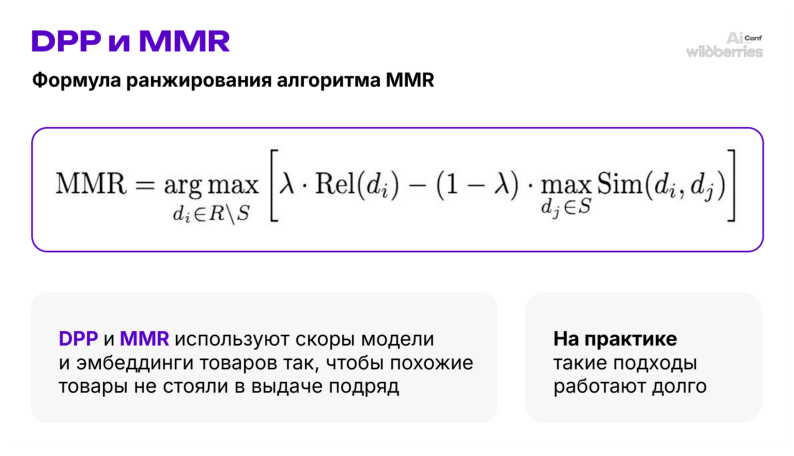

```json
{
  "text_content": "Заголовок: \"DPP и MMR\"\nПодзаголовок: \"Формула ранжирования алгоритма MMR\"\n\nФормула:\nMMR = arg max_{di ∈ R\S} [λ · Rel(di) - (1 - λ) · max_{dj ∈ S} Sim(di, dj)]\n\nТекстовые блоки:\n- \"DPP и MMR используют скорые модели и эмбеддинги товаров так, чтобы похожие товары не стояли в выдаче подряд.\"\n- \"На практике такие подходы работают долго.\"",

  "visual_content": "Формула представлена в центре слайда в виде математического выражения, выделенного рамкой. Формула написана черным шрифтом на белом фоне, что обеспечивает хороший контраст. Под формулой находятся два текстовых блока с пояснениями, оформленные в виде прямоугольников с закругленными углами и светло-серым фоном. Логотип компании \"wildberries\" расположен в правом верхнем углу слайда, а название конференции \"Ai conf\" - в правом нижнем углу.",

  "general_description": {
    "topic_overview": "Тема: Алгоритмы DPP и MMR\nЦель: Объяснить формулу ранжирования алгоритма MMR\nКлючевая информаци

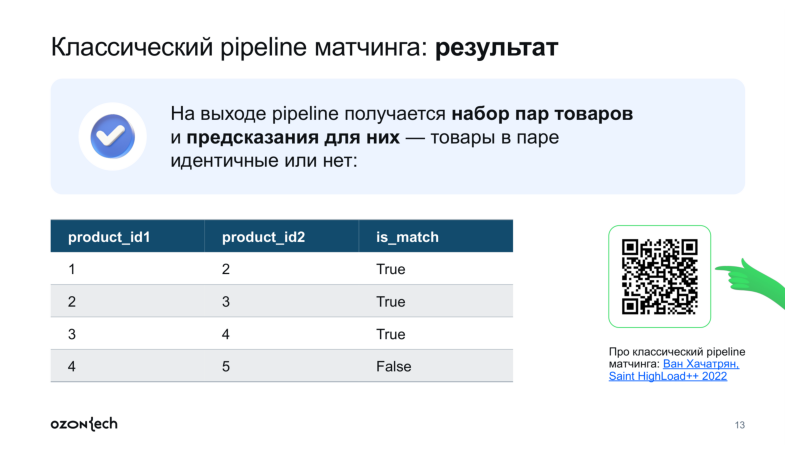

```json
{
  "text_content": "Заголовок: \"Классический pipeline матчинга: результат\"\n\nОсновной текст: \"На выходе pipeline получает набор пар товаров и предсказания для них — товары в паре идентичные или нет:\"\n\nТаблица:\n- product_id1\n- product_id2\n- is_match\n\nДанные в таблице:\n1. 1, 2, True\n2. 2, 3, True\n3. 3,



idx=219, n_empty=4 page 9 in '5.Устройство и перспективы использования ML-компиляторов_Виталий Шутов_вер.1'
-----------------


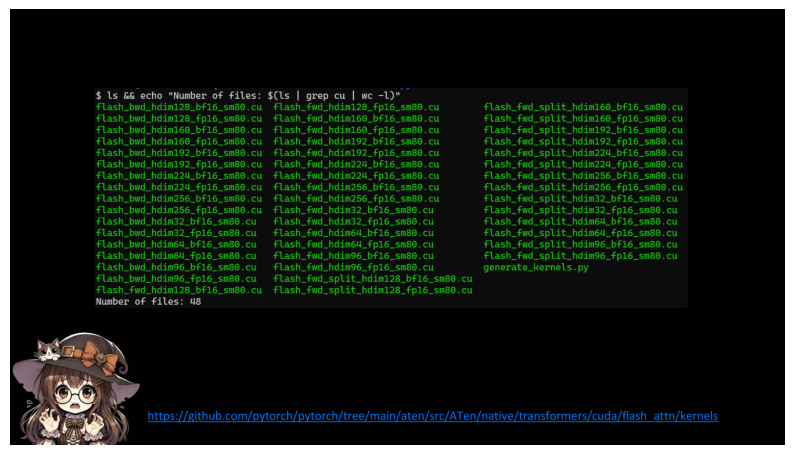

```json
{
  "text_content": "$ ls && echo \"Number of files: $(ls | grep cu | wc -l)\"\n.flash_bwd_hd128_bf16_sm80.cu\n.flash_bwd_hd128_fp16_sm80.cu\n.flash_bwd_hd160_bf16_sm80.cu\n.flash_bwd_hd160_fp16_sm80.cu\n.flash_bwd_hd192_bf16_sm80.cu\n.flash_bwd_hd192_fp16_sm80.cu\n.flash_bwd_hd224_bf16_sm80.cu\n.flash_bwd_hd224_fp16_sm80.cu\n.flash_bwd_hd256_bf16_sm80.cu\n.flash_bwd_hd256_fp16_sm80.cu\n.flash_bwd_hd32_bf16_sm80.cu\n.flash_bwd_hd32_fp16_sm80.cu\n.flash_bwd_hd384_bf16_sm80.cu\n.flash_bwd_hd384_fp16_sm80.cu\n.flash_bwd_hd48_bf16_sm80.cu\n.flash_bwd_hd48_fp16_sm80.cu\n.flash_bwd_hd64_bf16_sm80.cu\n.flash_bwd_hd64_fp16_sm80.cu\n.flash_bwd_hd80_bf16_sm80.cu\n.flash_bwd_hd80_fp16_sm80.cu\n.flash_fwd_hd128_bf16_sm80.cu\n.flash_fwd_hd128_fp16_sm80.cu\n.flash_fwd_hd160_bf16_sm80.cu\n.flash_fwd_hd160_fp16_sm80.cu\n.flash_fwd_hd192_bf16_sm80.cu\n.flash_fwd_hd192_fp16_sm80.cu\n.flash_fwd_hd224_bf16_sm80.cu\n.flash_fwd_hd224_fp16_sm80.cu\n.flash_fwd_hd256_bf16_sm80.cu\n.flash_fwd_hd256_fp16

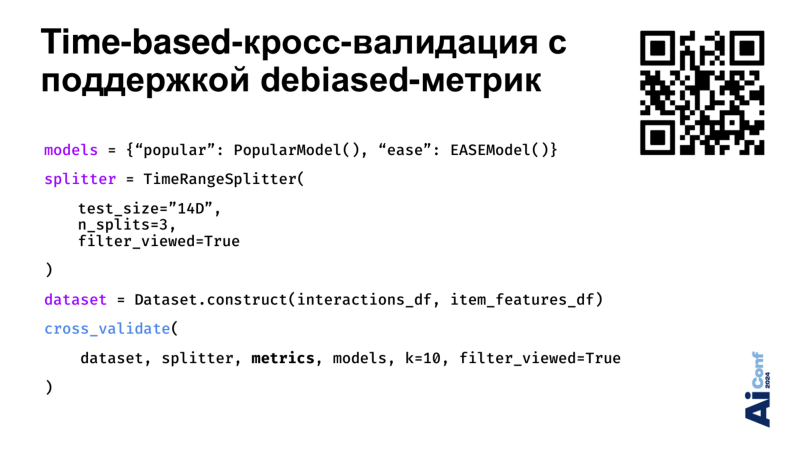

```json
{
  "text_content": "Основной заголовок: \"Time-based-кросс-валидация с поддержкой debiased-метрик\"\\n\\nКодовые блоки: \\nmodels = {\"popular\": PopularModel(), \"ease\": EASEModel()}\\nsplitter = TimeRangeSplitter(\\n    test_size=\"14d\",\\n    n_splits=3,\\n    filter_viewed=True\\n)\\ndataset = Dataset.construct(interactions_df, item_features_df)\\ncross_validate(\\n    dataset, splitter, metrics, models, k=10, filter_viewed=True\\n)\\n\\nQR-код: Ссылка на дополнительную информацию.",

  "visual_content": "Слайд содержит QR-код в правом нижнем углу, который ведет на дополнительный ресурс. Код



idx=3729, n_empty=2 page 73 in '3.ML на графах в e-commerce_Иван Антипов_вер.3'
-----------------


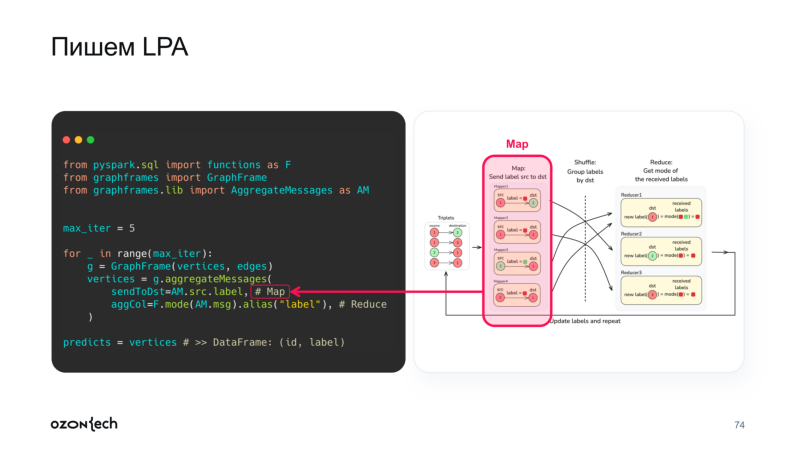

```json
{
  "text_content": "Заголовок: \"Пишем LPA\"\n\nКод:\nfrom pyspark.sql import functions as F\nfrom graphframes import GraphFrame\nfrom graphframes.lib import AggregateMessages as AM\n\nmax_iter = 5\n\nfor _ in range(max_iter):\n    g = GraphFrame(vertices, edges)\n    vertices = g.aggregateMessages(\n        sendToDst=AM.src.label,  # Map\n        aggCol=F.mode(AM.msg).alias(\"label\"),  # Reduce\n    )\n\npredicts = vertices  # >> DataFrame: (id, label)\n\nСтилизация текста: Код выделен моноширинным шрифтом, что помогает выделить программный код на фоне обычного текста.",

  "visual_content": "Слайд разделен на две части. Слева находится блок кода на черном фоне, который выделяется за счет моноширинного шрифта и яркого цвета текста. Справа - схема, иллюстрирующая процесс работы алгоритма LPA с пометками \"Map\" и \"Reduce\". Схема содержит стрелки и блоки, показывающие поток данных и операции, что помогает визуализировать процесс.\n\nКлючевые элементы схемы:\n- Блоки с пометк

In [45]:
from src.config.output_formatting import display_slide_image
for i, row in failed_to_describe.query("n_empty > 1").iterrows():
    print(f"idx={i}, n_empty={row['n_empty']} page {row['page']} in '{row['pres_title']}'")
    print("-----------------")
    display_slide_image(row["pres_title"], row["page"])
    print(row["llm_output"])
    print("\n\n")

### <a id='toc2_1_2_'></a>[График распределения](#toc0_)

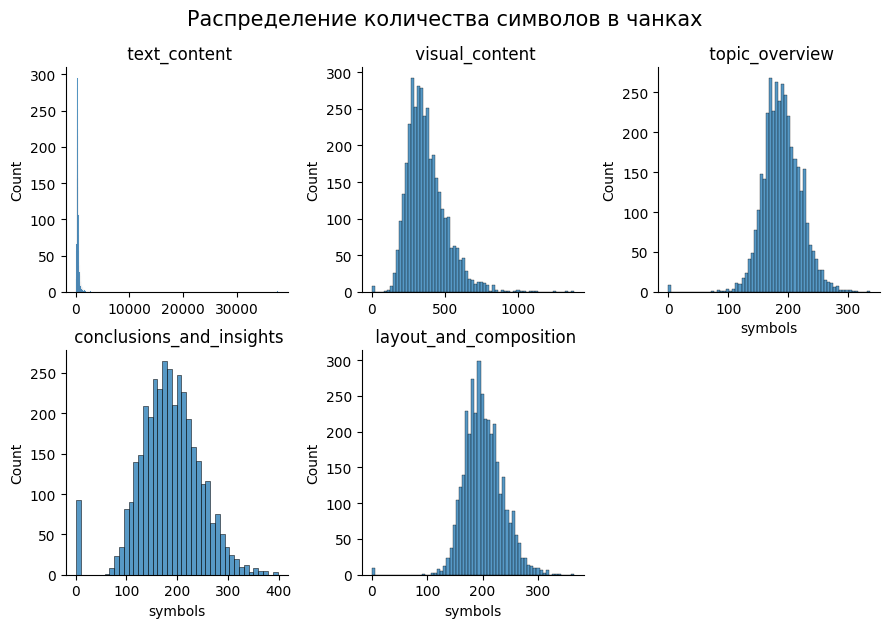

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(
    text_len_stats.melt(var_name="chunk", value_name="symbols"),
    col="chunk",
    col_wrap=3,
    sharex=False,
    sharey=False,
)
fig = g.map(sns.histplot, "symbols")

g.figure.suptitle("Распределение количества символов в чанках", y=1.04, size=15)

for ax in g.axes:
    cur_title = ax.title
    ax.set_title(cur_title.get_text().split("=")[-1][:-4])


### <a id='toc2_1_3_'></a>[Тот же график, но без выбросов](#toc0_)

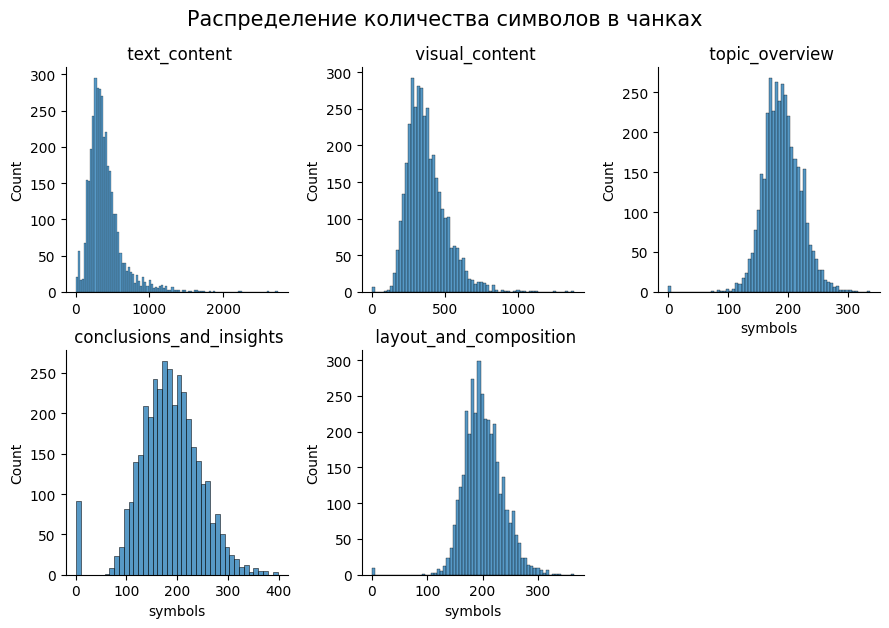

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(
    text_len_stats.query("text_content_len < 10000").melt(var_name="chunk", value_name="symbols"),
    col="chunk",
    col_wrap=3,
    sharex=False,
    sharey=False,
)
fig = g.map(sns.histplot, "symbols")

g.figure.suptitle("Распределение количества символов в чанках", y=1.04, size=15)

for ax in g.axes:
    cur_title = ax.title
    ax.set_title(cur_title.get_text().split("=")[-1][:-4])

### <a id='toc2_1_4_'></a>[GPT выдал очень длинную строку](#toc0_)
В презентации была последовательность файлов. GPT продолжал ее, видимо пока не кончились токены.

In [10]:
text_outliers = df_mod.iloc[text_len_stats.query("text_content_len > 10000").index]
text_outliers

,pres_path,pres_title,page,llm_output,text_content,visual_content,topic_overview,conclusions_and_insights,layout_and_composition,completion_tokens,prompt_tokens,text_content_len,visual_content_len,topic_overview_len,conclusions_and_insights_len,layout_and_composition_len
219,data/raw/data-science/aiconf/День1/1.Сфера/5.У...,5.Устройство и перспективы использования ML-ко...,9,"```json\n{\n ""text_content"": ""$ ls && echo \""...","$ ls && echo ""Number of files: $(ls | grep cu ...",,,,,16384,28885,37602,0,0,0,0


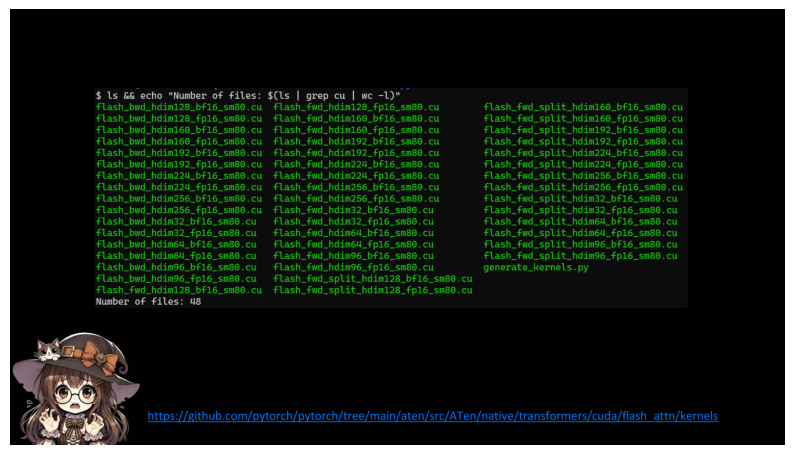

In [26]:
from src.config.output_formatting import display_slide_image

for i, row in text_outliers.iterrows():
    display_slide_image(row["pres_title"], row["page"])

In [12]:
text_content = text_outliers["text_content"].iloc[0]
print(text_content[:1000])
print("----\n[... The rest is not printed for shortness]")

$ ls && echo "Number of files: $(ls | grep cu | wc -l)"
.flash_bwd_hd128_bf16_sm80.cu
.flash_bwd_hd128_fp16_sm80.cu
.flash_bwd_hd160_bf16_sm80.cu
.flash_bwd_hd160_fp16_sm80.cu
.flash_bwd_hd192_bf16_sm80.cu
.flash_bwd_hd192_fp16_sm80.cu
.flash_bwd_hd224_bf16_sm80.cu
.flash_bwd_hd224_fp16_sm80.cu
.flash_bwd_hd256_bf16_sm80.cu
.flash_bwd_hd256_fp16_sm80.cu
.flash_bwd_hd32_bf16_sm80.cu
.flash_bwd_hd32_fp16_sm80.cu
.flash_bwd_hd384_bf16_sm80.cu
.flash_bwd_hd384_fp16_sm80.cu
.flash_bwd_hd48_bf16_sm80.cu
.flash_bwd_hd48_fp16_sm80.cu
.flash_bwd_hd64_bf16_sm80.cu
.flash_bwd_hd64_fp16_sm80.cu
.flash_bwd_hd80_bf16_sm80.cu
.flash_bwd_hd80_fp16_sm80.cu
.flash_fwd_hd128_bf16_sm80.cu
.flash_fwd_hd128_fp16_sm80.cu
.flash_fwd_hd160_bf16_sm80.cu
.flash_fwd_hd160_fp16_sm80.cu
.flash_fwd_hd192_bf16_sm80.cu
.flash_fwd_hd192_fp16_sm80.cu
.flash_fwd_hd224_bf16_sm80.cu
.flash_fwd_hd224_fp16_sm80.cu
.flash_fwd_hd256_bf16_sm80.cu
.flash_fwd_hd256_fp16_sm80.cu
.flash_fwd_hd32_bf16_sm80.cu
.flash_fwd_hd32_fp16_sm

In [13]:
print("N lines in the example above:", len(text_content.split("\n")))

N lines in the example above: 1310


## <a id='toc2_2_'></a>[Распределение количества токенов](#toc0_)

Сразу обрежу выброс в text_content

In [32]:
import tiktoken

def count_tokens(text):
    encoding = tiktoken.encoding_for_model("gpt-4o")
    tokens = encoding.encode(text)
    return len(tokens)

tokenizer = tiktoken.encoding_for_model("gpt-4o")
encoded = tokenizer.encode(df.iloc[0].text_content)
tokens = [x.decode() for x in tokenizer.decode_tokens_bytes(encoded)]
print(tokens)

['З', 'аг', 'олов', 'ок', ':', ' "', 'М', 'од', 'ера', 'ция', ' вход', 'ных', ' изображ', 'ений', '"\n', 'Под', 'з', 'аг', 'олов', 'ок', ':', ' "', 'В', 'ир', 'ту', 'альная', ' фот', 'ос', 'ъ', 'ём', 'ка', '"\n\n', 'Э', 'лем', 'енты', ' интерф', 'ей', 'са', ':\n', '-', ' Ис', 'ход', 'ные', ' параметры', ':\n', ' ', ' -', ' Пол', ':', ' Муж', 'ской', '\n', ' ', ' -', ' Кат', 'ег', 'ории', ':', ' Ф', 'ут', 'бол', 'ки', ' и', ' пол', 'о', '\n', '-', ' Р', 'езульт', 'ат', ' будет', ' лучше', ',', ' если', ' соблюдать', ' рекомендации', ' к', ' фотограф', 'ия', 'м', ' товара', '\n', '-', ' К', 'ноп', 'ка', ':', ' "', 'С', 'ген', 'ер', 'ировать', '"\n\n', 'С', 'тили', 'зация', ' текста', ':', ' Заг', 'олов', 'ок', ' выдел', 'ен', ' круп', 'ным', ' ш', 'риф', 'том', ',', ' чтобы', ' привлеч', 'ь', ' внимание', ' к', ' теме', ' с', 'лайда', '.']


In [33]:
text_token_stats = (
    df.loc[:, "text_content":"layout_and_composition"]
    .map(count_tokens)
    .add_suffix("_tokens")
)
df_mod = df.join(text_token_stats)
df_mod.sample(3)

,pres_path,pres_title,page,llm_output,text_content,visual_content,topic_overview,conclusions_and_insights,layout_and_composition,completion_tokens,prompt_tokens,text_content_tokens,visual_content_tokens,topic_overview_tokens,conclusions_and_insights_tokens,layout_and_composition_tokens
550,data/raw/data-science/aiconf/День1/2.Полусфера...,5.Вместо зеленого экрана_Елизавета Петрова_вер.4,50,"```json\n{\n ""text_content"": ""Заголовок: \""По...","Заголовок: ""Подбор параметров аугментаций""\n\n...","На слайде представлены три изображения, распол...",Тема: Подбор параметров аугментаций\nЦель: Пок...,Основной вывод: Правильный выбор параметров ау...,Слайд имеет горизонтальную компоновку с тремя ...,361,28885,68,89,60,29,55
690,data/raw/data-science/aiconf/День2/1.Сфера/3.3...,3.3D pose estimation_Aлександр Тимофеев-Карако...,70,"```json\n{\n ""text_content"": ""Заголовок: \""Ре...","Заголовок: ""Результаты Active learning""\n\nПод...",Линейный график с двумя линиями:\n- Красная ли...,Тема: Результаты применения Active learning\nЦ...,Основные выводы:\n- Эффективность методов Acti...,"График занимает центральную часть слайда, заго...",426,40219,99,98,49,60,51
2457,data/raw/data-science/aiconf/День2/3.Аудитория...,6.От промпта к агентной системе_Никита Венедик...,59,"```json\n{\n ""text_content"": ""Заголовок: \""Se...","Заголовок: ""Semantic+LLM""\n\nПодзаголовок: ""2....","Схема, показывающая процесс взаимодействия пол...",Тема: Взаимодействие семантических технологий ...,Основные выводы:\n- Семантика позволяет масшта...,Слайд имеет четкую структуру: заголовок вверху...,510,4241,145,139,58,44,53


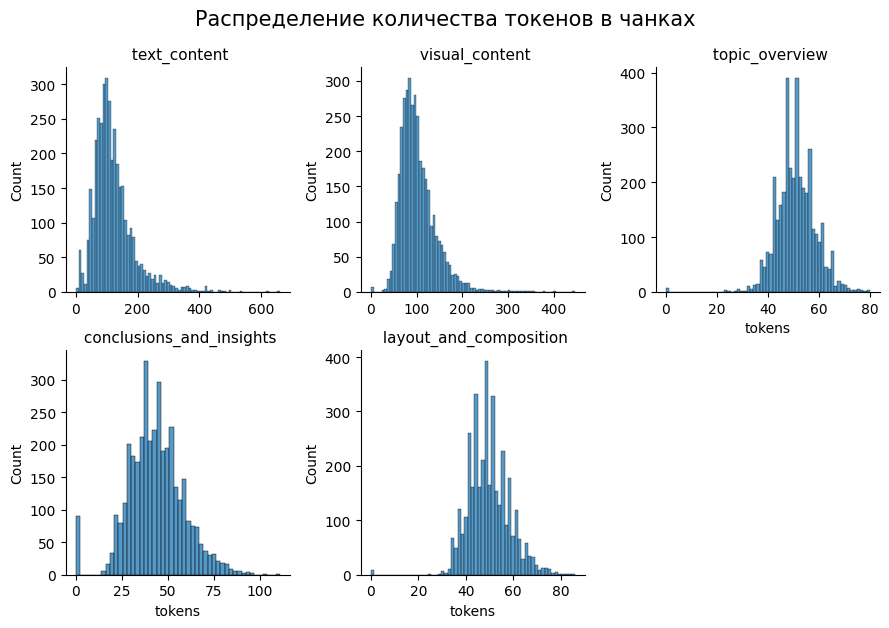

In [36]:
g = sns.FacetGrid(
    text_token_stats.query("text_content_tokens < 1000").melt(var_name="chunk", value_name="tokens"),
    col="chunk",
    col_wrap=3,
    sharex=False,
    sharey=False,
)
fig = g.map(sns.histplot, "tokens")

g.figure.suptitle("Распределение количества токенов в чанках", y=1.04, size=15)

for ax in g.axes:
    cur_title = ax.title
    ax.set_title(cur_title.get_text().split("=")[-1][:-7], size=11)


# <a id='toc3_'></a>[Outliers](#toc0_)
## <a id='toc3_1_'></a>[Visual Content](#toc0_)

Visual_Content > 350: токенов в основном описания таблиц с перечислением значений в ячейках

In [37]:
margin = 350
visual_outliers = (
    df_mod
    .query("visual_content_tokens > @margin")
    .sort_values("visual_content_tokens", ascending=False)
)
print(f"N visual outliers: {len(visual_outliers)}")
visual_outliers.head(5)

N visual outliers: 5


,pres_path,pres_title,page,llm_output,text_content,visual_content,topic_overview,conclusions_and_insights,layout_and_composition,completion_tokens,prompt_tokens,text_content_tokens,visual_content_tokens,topic_overview_tokens,conclusions_and_insights_tokens,layout_and_composition_tokens
2330,data/raw/data-science/aiconf/День2/1.Сфера/6.Г...,6.Генерация видео from zero to hero_Денис Дими...,24,"```json\n{\n ""text_content"": ""Заголовок: \""Го...","Заголовок: ""Гонка видео моделей""\nПодзаголовок...",Таблица с 8 колонками и 7 строками (включая за...,Тема: Гонка видео моделей в области генерации ...,Основные выводы:\n- Open AI ведет гонку с моде...,Слайд имеет четкую структуру: заголовок и подз...,838,28885,156,446,50,62,47
2109,data/raw/business/insider_infor/dodo-brands-mo...,dodo-brands-monthly-trading-update-sep-2024,3,"```json\n{\n ""text_content"": ""Заголовок: \""Со...","Заголовок: ""Состояние и перспективы развития с...","Слайд содержит 4 блока, каждый из которых пред...",Тема: Состояние и перспективы развития сети ма...,Основные выводы:\n- Наибольшее количество суще...,"Слайд организован в виде сетки с 4 блоками, ка...",1006,28885,310,404,56,72,61
3307,data/raw/business/business_incognita/SP_Навига...,SP_Навигатор_по_мерам_гос_поддержки_2024_74_стр,9,"```json\n{\n ""text_content"": ""Заголовок: \""Пр...","Заголовок: ""Проектное финансирование промышлен...","Таблица с 7 колонками и 3 строками, содержащая...",Тема: Проектное финансирование промышленного п...,Основные выводы:\n- ФРП предлагает разнообразн...,Слайд имеет четкую иерархическую структуру:\n-...,794,28885,113,379,51,90,69
3244,data/raw/business/insider_infor/AXES_х_Понимаю...,AXES_х_Понимаю_Исследование_практик_благополуч...,4,"```json\n{\n ""text_content"": ""Заголовок: \""ВЫ...","Заголовок: ""ВЫБОРКА ОПРОСА""\n\nОсновной текст:...","На слайде представлены три круговые диаграммы,...",Тема: Результаты опроса среди компаний\nЦель: ...,Основные выводы:\n- Преобладание производствен...,Слайд разделен на три части: слева - первая ди...,762,28885,130,356,58,53,52
2746,data/raw/business/business_incognita/АИМ_Комму...,АИМ_Коммунальное_хозяйство_2024_31_стр,29,"```json\n{\n ""text_content"": ""Заголовок: \""То...","Заголовок: ""Топ-5 сделок 2018-2023""\n\nСтолбцы...","Таблица, состоящая из 5 строк и 5 колонок. Каж...",Тема: Топ-5 сделок в сфере инвестиций за перио...,Основные выводы:\n- Наибольший объем инвестици...,Слайд имеет четкую структуру: заголовок в верх...,671,28885,84,352,56,64,36


In [38]:
print_df(visual_outliers)

idx=2330 page 24 in 6.Генерация видео from zero to hero_Денис Димитров_вер.5
-----------------
Text Content:
    Заголовок: "Гонка видео моделей"
    Подзаголовок: "В области генерации видео (VGM) разворачивается гонка 
    аналогичная гонке LLM"
    
    Текст: "15 февраля 2024 года Open AI анонсировала свою модель 
    генерации видео под названием Sora, которая существенно превосходит 
    все предыдущие модели. С этого момента ещё 5 компаний представили свои
     модели генерации видео сопоставимого качества."
    
    Стилизация текста: Заголовок выделен жирным шрифтом, размер 32pt, 
    подзаголовок - 24pt, основной текст - 18pt. Заголовок и подзаголовок 
    имеют синий цвет, что подчеркивает их важность.
Visual Content:
    Таблица с 8 колонками и 7 строками (включая заголовок).
    
    Структура таблицы:
    - Колонки: Компания, Модель, Страна, Статус, Дата, Вычислительные 
    ресурсы (предположительно), Данные (предположительно), Архитектура, 
    Output.
    - Первая строк

## <a id='toc3_2_'></a>[Conclusions and Insights](#toc0_)
Здесь без особых причин, просто иногда получаются длинные conclusions

In [39]:
margin = 100
conc_outliers = (
    df_mod
    .query("conclusions_and_insights_tokens > @margin")
    .sort_values("conclusions_and_insights_tokens", ascending=False)
)
print(f"N conclusions_and_insights outliers: {len(conc_outliers)}")
conc_outliers.head(5)

N conclusions_and_insights outliers: 2


,pres_path,pres_title,page,llm_output,text_content,visual_content,topic_overview,conclusions_and_insights,layout_and_composition,completion_tokens,prompt_tokens,text_content_tokens,visual_content_tokens,topic_overview_tokens,conclusions_and_insights_tokens,layout_and_composition_tokens
2213,data/raw/data-science/aiconf/День1/4.Пресс-цен...,"5.Жестовый язык особенности сбора данных, опыт...",23,"```json\n{\n ""text_content"": ""Основной заголо...","Основной заголовок: ""2.2. Непрерывная жестовая...","Таблица с 6 колонками и 5 строками, содержащая...",Тема: Непрерывная жестовая речь\nЦель: Предста...,"Основные выводы:\n- Набор данных RSL, 2021 сод...",Слайд имеет четкую структуру:\n- Заголовок рас...,732,28885,97,334,51,111,62
2738,data/raw/business/business_incognita/АИМ_Комму...,АИМ_Коммунальное_хозяйство_2024_31_стр,28,"```json\n{\n ""text_content"": ""Заголовок: \""Ст...","Заголовок: ""Структура сделок в России и в мире...",Слайд содержит несколько визуальных элементов:...,Тема: Структура сделок в России и в мире\nЦель...,Основные выводы:\n- В России основное внимание...,Слайд организован в три основные части: верхня...,894,28885,372,208,62,103,68


In [40]:
print_df(conc_outliers)

idx=2213 page 23 in 5.Жестовый язык особенности сбора данных, опыт и результаты_Петр Суровцев_вер.3
-----------------
Text Content:
    Основной заголовок: "2.2. Непрерывная жестовая речь"
    
    Таблица данных:
    - Дatasets (Наборы данных)
    - Videos (Видео)
    - Signers (Жестовые исполнители)
    - Hours (Часы)
    - Source (Источник)
    - Language (Язык)
    
    Стилизация текста: заголовок выделен жирным шрифтом, размер шрифта 
    увеличен для акцента на теме слайда.
Visual Content:
    Таблица с 6 колонками и 5 строками, содержащая данные о различных 
    наборах жестовой речи. Каждая колонка имеет цветовое оформление:
    - Зеленая для 'Datasets'
    - Желтая для 'Videos'
    - Голубая для 'Signers'
    - Розовая для 'Source'
    - Серо-голубая для 'Language'
    
    Строки таблицы содержат следующие данные:
    1. RSL, 2021: 35K видео, 5 жестовых исполнителей, источник: Lab, язык:
     Русский
    2. PHOENIX-14, 2015: 7K видео, 9 жестовых исполнителей, 12.5 часов, 
  